# Customer Segmentation Classification

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation/

Sebuah perusahaan mobil mempunyai rencana untuk memasuki pasar baru dengan produk yang sudah ada (P1, P2, P3, P4, dan P5). Setelah melakukan riset pasar yang intensif, mereka menyimpulkan bahwa perilaku pasar baru serupa dengan pasar yang sudah ada.

Di pasar yang ada, tim penjualan telah mengklasifikasikan semua pelanggan menjadi 4 segmen (A, B, C, D). Kemudian, mereka melakukan penjangkauan dan komunikasi tersegmentasi untuk segmen pelanggan yang berbeda. Strategi ini berhasil dengan sangat baik bagi mereka. Mereka berencana menggunakan strategi yang sama untuk pasar baru dan telah mengidentifikasi 2627 pelanggan potensial baru. Anda diharuskan membantu manajer untuk memprediksi kelompok pelanggan baru yang tepat. Terdapat 11 kolom

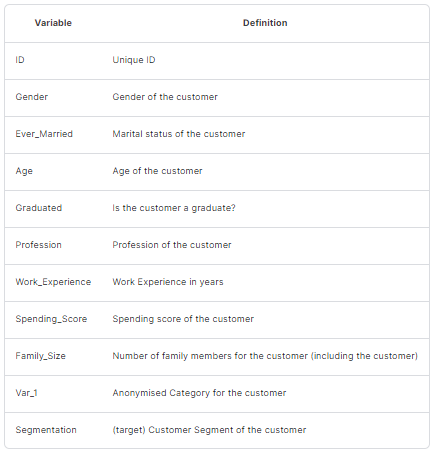

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load data
data_train = pd.read_csv('Train.csv')
data_test = pd.read_csv('Test.csv')

## _EDA_

In [3]:
# Ambil Data teratas
data_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Informasi General pada Data
data_train.info()
# Informasi Jumlah Baris dan Kolom
data_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


(8068, 11)

In [5]:
# Informasi Statistika Dasar pada Data Numerik
data_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
# Informasi Statistika Dasar pada Data Kategorikal
data_train.describe(include=['object'])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [7]:
# Informasi jumlah data NaN
data_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

### _Handling Missing Value_

In [8]:
# Mengisi kolom Work_Experience dengan rata-rata
we_mean = data_train['Work_Experience'].mean()
data_train = data_train.fillna({'Work_Experience': we_mean})

In [9]:
# Mengisi kolom Family_Size dengan rata-rata yang dibulatkan
fs_mean = round(data_train['Family_Size'].mean())
data_train = data_train.fillna({'Family_Size': fs_mean})

In [10]:
# Mengisi kolom Ever_Married dengan modus 
em_modus = data_train['Ever_Married'].mode()
data_train = data_train.fillna({'Ever_Married': em_modus})

In [11]:
# Menghapus
data_train = data_train.dropna(subset=['Ever_Married', 'Var_1', 'Profession', 'Graduated'])

In [12]:
# Cek data kosong
data_train.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [13]:
# Cek kembali jumlah data
data_train.shape

(7669, 11)

In [14]:
# Cek Data Duplikat
data_train.duplicated().sum()

0

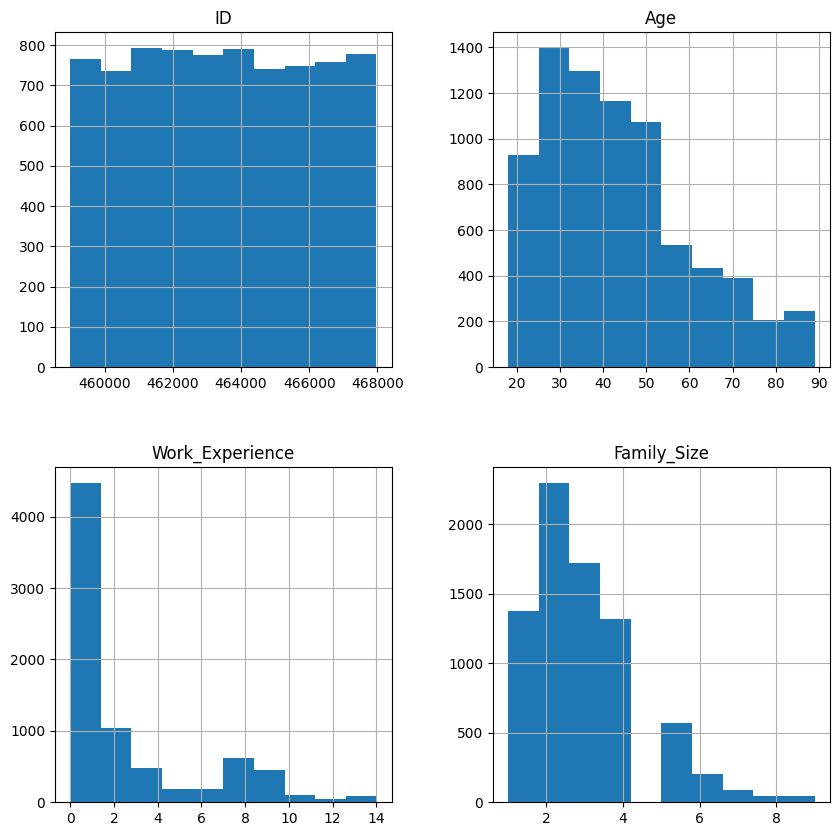

In [15]:
data_train.hist(figsize=(10,10))
plt.show()

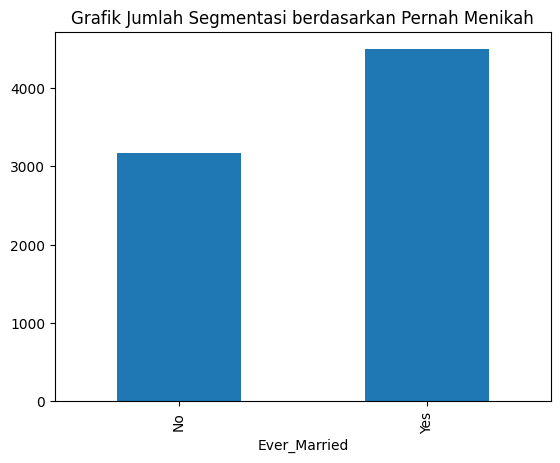

In [16]:
married = data_train.groupby('Ever_Married')['Segmentation'].count()
married.plot(kind='bar')
plt.title('Grafik Jumlah Segmentasi berdasarkan Pernah Menikah')
plt.show()

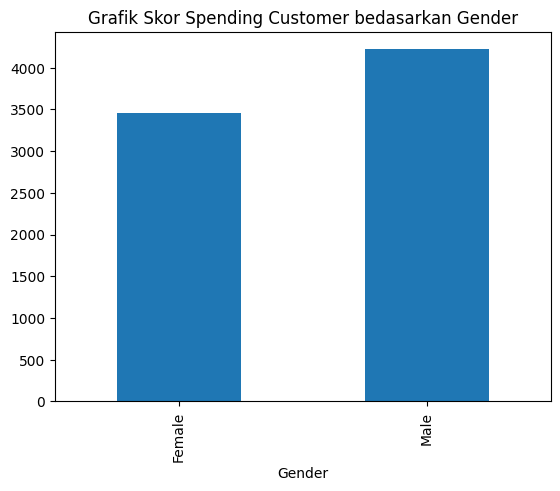

In [17]:
spendingScore = data_train.groupby('Gender')['Spending_Score'].count()
spendingScore
spendingScore.plot(kind='bar')
plt.title('Grafik Skor Spending Customer bedasarkan Gender')
plt.show()

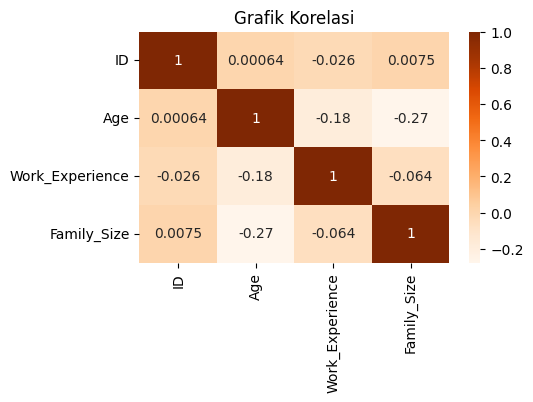

In [18]:
df_num = data_train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(5,3))
plt.title('Grafik Korelasi')
sns.heatmap(df_num.corr(), annot=True, cmap="Oranges")
plt.show()